In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math

In [3]:
df = pd.read_csv("../Data_Generation/Data_files/bfs_heisenberg_data.csv")

In [10]:
cube_df = df[df['val1']<10]
cube_df = cube_df[cube_df['val2']<10]
cube_df = cube_df[cube_df['val3']<10]

cube_df = cube_df[cube_df['val1']>=0]
cube_df = cube_df[cube_df['val2']>=0]
cube_df = cube_df[cube_df['val3']>=0]

# TODO what the heck? 
cube_df.shape

(1752, 5)

In [26]:
# where each matrix is like [[1, a, c], [0, 1, b], [0, 0, 1]]

# B is the inverse of A
A = np.array([[1, 1, 0], [0, 1, 0], [0, 0, 1]])
B = np.array([[1, -1, 0], [0, 1, 0], [0, 0, 1]])

# C is the inverse of D
C = np.array([[1, 0, 0], [0, 1, 1], [0, 0, 1]])
D = np.array([[1, 0, 0], [0, 1, -1], [0, 0, 1]])

identity = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

In [27]:
def max_a_b_sqrt_c(row):
    return max(abs(row['val1']), 
    abs(row['val3']), 
    math.sqrt(abs(row['val2'])))

df['max_a_b_sqrt_c'] = df.apply(max_a_b_sqrt_c, axis=1)

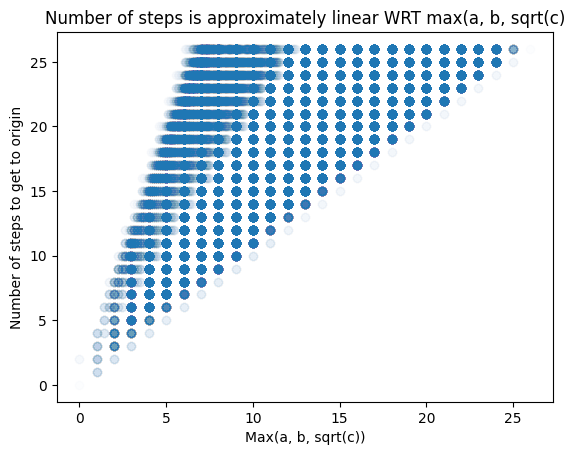

In [28]:
plt.scatter(x=df['max_a_b_sqrt_c'], y=df['num_steps'], alpha=0.01)
plt.xlabel("Max(a, b, sqrt(c))")
plt.ylabel("Number of steps to get to origin")
plt.title("Number of steps is approximately linear WRT max(a, b, sqrt(c)")

plt.show()

In [29]:
def min_a_b_sqrt_c(row):
    return min(abs(row['val1']), 
    abs(row['val3']), 
    math.sqrt(abs(row['val2'])))

df['min_a_b_sqrt_c'] = df.apply(min_a_b_sqrt_c, axis=1)

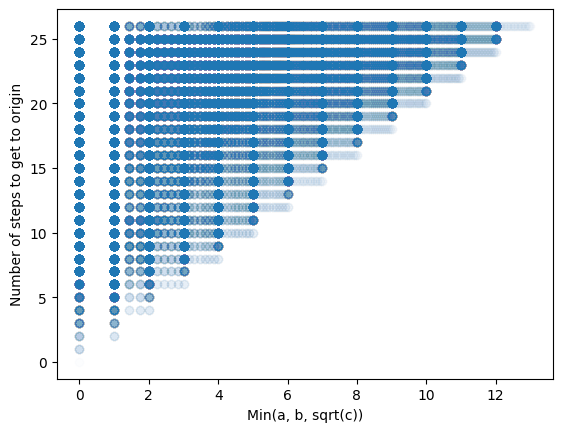

In [30]:
plt.scatter(x=df['min_a_b_sqrt_c'], y=df['num_steps'], alpha=0.01)
plt.xlabel("Min(a, b, sqrt(c))")
plt.ylabel("Number of steps to get to origin")
# not a particularly useful plot
plt.show()

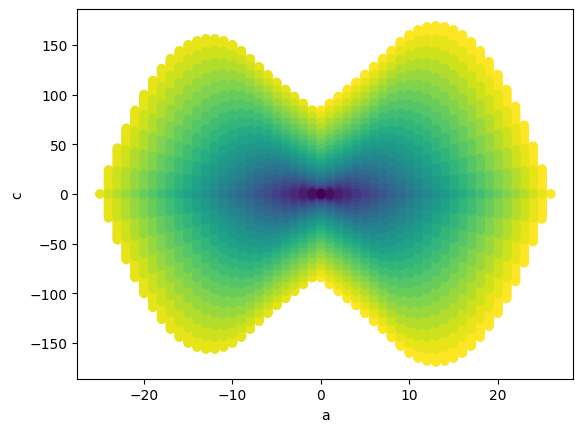

In [31]:
# Look at these points two variables at a time

plt.scatter(x=df['val1'], y=df['val2'], c=df['num_steps'])
plt.xlabel("a")
plt.ylabel("c")
plt.show()

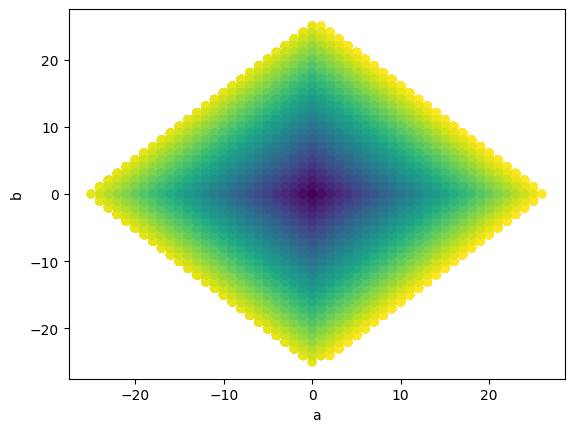

In [32]:
plt.scatter(x=df['val1'], y=df['val3'], c=df['num_steps'])
plt.xlabel("a")
plt.ylabel("b")
plt.show()

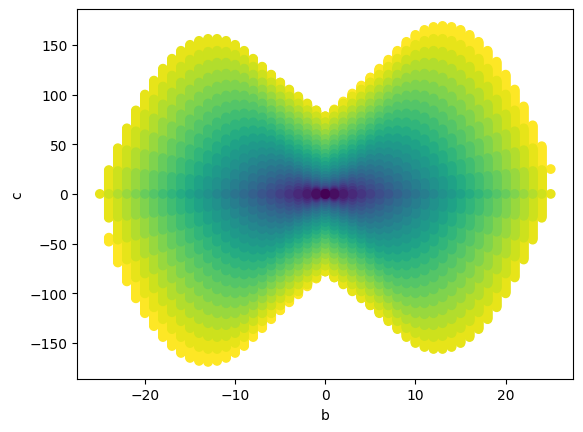

In [33]:
plt.scatter(x=df['val3'], y=df['val2'], c=df['num_steps'])
plt.xlabel("b")
plt.ylabel("c")
plt.show()

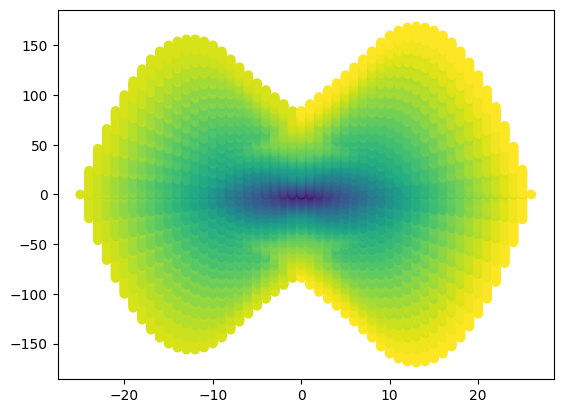

In [51]:
# Adapted from ChatGPT
# group by two variables at a time, compute the mean, then plot that
grouped = df.groupby(['val1', 'val2']).mean()

x = grouped.index.get_level_values('val1')
y = grouped.index.get_level_values('val2')

plt.xlabel("a")
plt.ylabel("c")

plt.scatter(x, y, c=grouped['num_steps'])


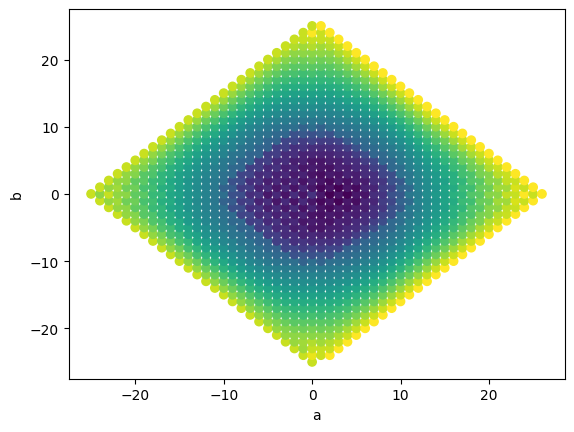

In [52]:
# Adapted from ChatGPT
# group by two variables at a time, compute the mean, then plot that
grouped = df.groupby(['val1', 'val3']).mean()

x = grouped.index.get_level_values('val1')
y = grouped.index.get_level_values('val3')

plt.xlabel("a")
plt.ylabel("b")

plt.scatter(x, y, c=grouped['num_steps'])


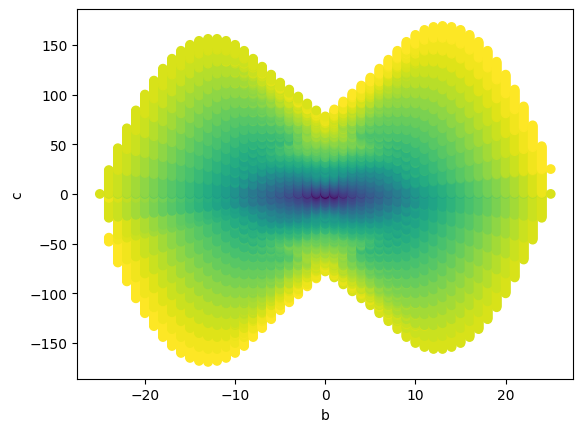

In [53]:
# Adapted from ChatGPT
# group by two variables at a time, compute the mean, then plot that
grouped = df.groupby(['val3', 'val2']).mean()

x = grouped.index.get_level_values('val3')
y = grouped.index.get_level_values('val2')

plt.xlabel("b")
plt.ylabel("c")

plt.scatter(x, y, c=grouped['num_steps'])


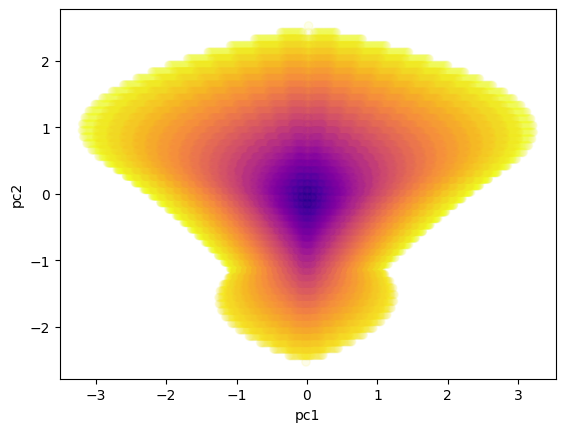

In [59]:
df1=pd.DataFrame(df[['val1', 'val2', 'val3']])
 
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method 
scaling.fit(df1)
Scaled_data=scaling.transform(df1)
 
# Set the n_components=2
principal=PCA(n_components=2)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

plt.scatter(x[:,0],x[:,1],c=df['num_steps'],cmap='plasma', alpha=0.1)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

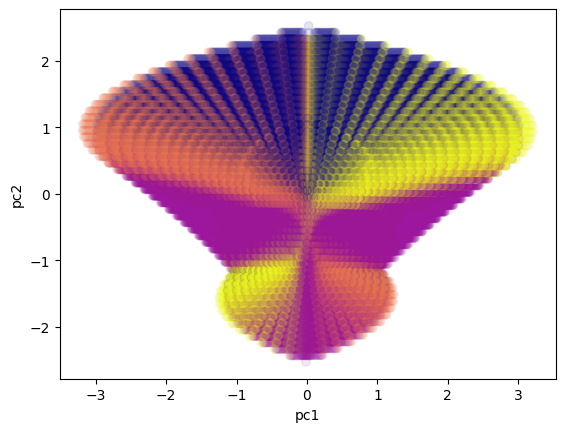

In [58]:
plt.scatter(x[:,0],x[:,1],c=df['last_matrix'],cmap='plasma', alpha=0.1)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

Text(0.5, 0, 'b')

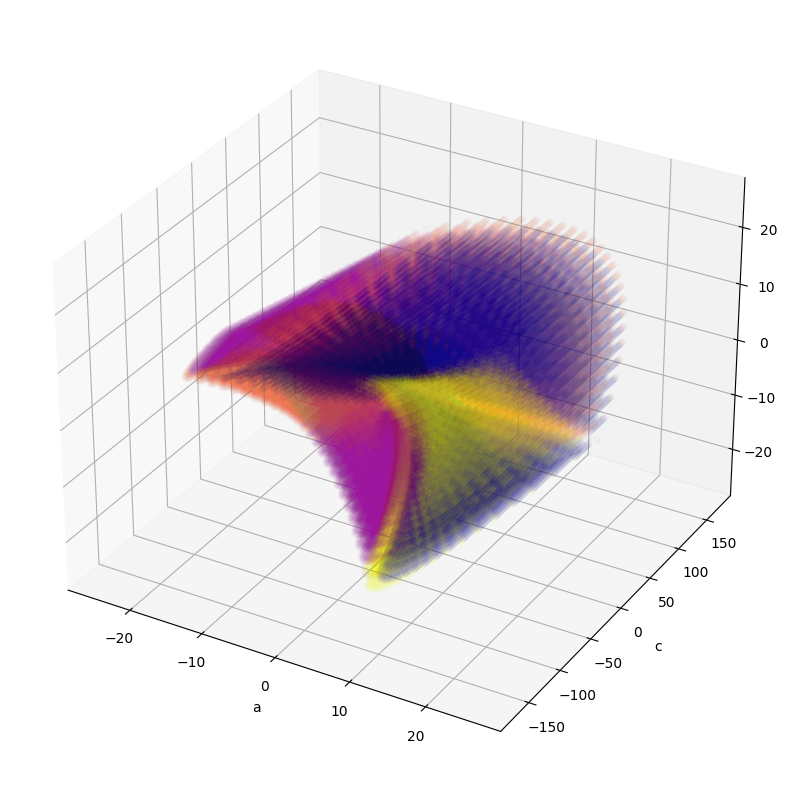

In [61]:
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
axis.scatter(df['val1'], df['val2'], df['val3'], c=df['last_matrix'], cmap='plasma', alpha=0.02)
axis.set_xlabel("a", fontsize=10)
axis.set_ylabel("c", fontsize=10)
axis.set_zlabel("b", fontsize=10)